# Imports

In [1]:
%config IPCompleter.greedy=True
import os

#    Type hinting
import typing

#    Data Manipulation
import pandas as pd
#    pandas settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#    Linear Algebra
import numpy as np

#    Data Visualization
import matplotlib.pyplot as plt    
import seaborn as sns

#    Regular Expressions
import re

# Load Data

In [2]:
project_dir = os.path.abspath('..')
data_path = '/data/detroit_911_calls.csv'

csv_path = project_dir + data_path


df = pd.read_csv(csv_path)

/home/devel/opt/miniconda3/envs/p911/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Explore

In [3]:
df.head()

,X,Y,incident_id,agency,incident_address,zip_code,priority,callcode,calldescription,category,call_timestamp,precinct_sca,respondingunit,officerinitiated,intaketime,dispatchtime,traveltime,totalresponsetime,time_on_scene,totaltime,neighborhood,block_id,council_district,longitude,latitude,oid
0,-82.986962,42.408358,201626400002,DPD,Promenade Ave & Roseberry St,48213,3,825030,DISTURBANCE,DISTURB,2016-09-20T09:36:12.000Z,910A,NaN,No,2.2,528.6,15.5,546.6,120.5,667.1,Wade,2.616350e+14,4.0,-82.986962,42.408358,258148067
1,-83.185213,42.430914,201626400019,DPD,Ardmore St & W 7 Mile Rd,48235,2,811020,AUTO X UNK INJ / IMPAIRED,ACCUNK,2016-09-20T09:46:32.000Z,1201,NaN,No,2.7,5.2,6.4,14.5,59.1,73.6,Tri-Point,2.616354e+14,2.0,-83.185213,42.430914,258148068
2,-83.146057,42.438770,201626400020,DPD,Pembroke Ave & Prairie St,48221,3,374030,RECOVER AUTO,RECAUTO,2016-09-20T09:48:24.000Z,123B,NaN,No,4.9,NaN,NaN,NaN,NaN,NaN,Oak Grove,2.616354e+14,2.0,-83.146057,42.438770,258148069
3,-83.191603,42.358257,201626400024,DPD,Joy Rd & Robson St,48228,3,825030,DISTURBANCE,DISTURB,2016-09-20T09:50:29.000Z,0207,NaN,No,1.4,3.4,7.6,15.0,41.7,56.7,We Care Community,2.616354e+14,7.0,-83.191603,42.358257,258148070
4,-83.175124,42.360867,201626400029,DPD,Littlefield St & Ellis St,48228,3,374030,RECOVER AUTO,RECAUTO,2016-09-20T09:54:37.000Z,28A,NaN,No,3,"1,645.3",NaN,NaN,NaN,"1,668.4",Barton-McFarland,2.616354e+14,7.0,-83.175124,42.360867,258148071


In [4]:
df.tail()

,X,Y,incident_id,agency,incident_address,zip_code,priority,callcode,calldescription,category,call_timestamp,precinct_sca,respondingunit,officerinitiated,intaketime,dispatchtime,traveltime,totalresponsetime,time_on_scene,totaltime,neighborhood,block_id,council_district,longitude,latitude,oid
2724579,-83.052005,42.426120,202005204117,DPD,E Nevada St & Conley St,48234,3,W4807,START OF SHIFT INFORMATION,STRTSHFT,2020-02-22T00:54:20.000Z,118A,,Yes,0,0,0,0,0.2,0.2,Davison,2.616351e+14,3.0,-83.052005,42.426120,260872646
2724580,-83.142958,42.330656,202005204125,DPD,Saint Lawrence St & Michigan Ave,48210,3,875030,HANGUP CALLS,HNGUP,2020-02-22T00:55:50.000Z,0404,NaN,No,3.2,NaN,NaN,NaN,NaN,NaN,Claytown,2.616353e+14,6.0,-83.142958,42.330656,260872647
2724581,-83.037278,42.426447,202005204127,DPD,E Nevada St & Filer St,48234,2,TS,TRAFFIC STOP,TRF STOP,2020-02-22T00:56:08.000Z,119C,,Yes,0,0,0,0,3.5,3.5,Grant,2.616351e+14,3.0,-83.037278,42.426447,260872648
2724582,-83.170221,42.325715,202005204128,DPD,Hartwell Ave & Colson Ave,48126,3,875030,HANGUP CALLS,HNGUP,2020-02-22T00:56:45.000Z,,NaN,No,0.4,NaN,NaN,NaN,NaN,NaN,NaN,2.616357e+14,NaN,-83.170221,42.325715,260872649
2724583,-83.114986,42.432141,202005204138,DPD,W 7 Mile Rd & Woodward Ave,48203,3,331030,ROBBERY ARMED REPORT,RARPT,2020-02-22T00:58:40.000Z,1205,,Yes,0,0,0,0,0.7,0.7,Grixdale Farms,2.616354e+14,2.0,-83.114986,42.432141,260872650


In [5]:
df.describe()

,X,Y,incident_id,block_id,council_district,longitude,latitude,oid
count,2.724584e+06,2.724584e+06,2.724584e+06,2.625197e+06,2.590118e+06,2.724584e+06,2.724584e+06,2.724584e+06
mean,-8.310410e+01,4.238028e+01,2.018342e+11,2.616335e+14,4.277180e+00,-8.310410e+01,4.238028e+01,2.595104e+08
std,1.040202e-01,4.315950e-02,9.680347e+07,3.241627e+10,1.959090e+00,1.040202e-01,4.315950e-02,7.865198e+05
min,-8.413221e+01,4.208159e+01,2.016264e+11,2.609923e+14,1.000000e+00,-8.413221e+01,4.208159e+01,2.581481e+08
25%,-8.317814e+01,4.235210e+01,2.017322e+11,2.616351e+14,3.000000e+00,-8.317814e+01,4.235210e+01,2.588292e+08
50%,-8.309733e+01,4.237975e+01,2.018279e+11,2.616352e+14,5.000000e+00,-8.309733e+01,4.237975e+01,2.595104e+08
75%,-8.303696e+01,4.241669e+01,2.019178e+11,2.616354e+14,6.000000e+00,-8.303696e+01,4.241669e+01,2.601915e+08
max,-8.271078e+01,4.268528e+01,2.020052e+11,2.616399e+14,7.000000e+00,-8.271078e+01,4.268528e+01,2.608726e+08


In [6]:
df.shape

(2724584, 26)

One thing that immediately stands out is it seems that we may have two sets of columns representing the latitude and longitude (['X', 'Y'] and ['longitude', 'latitude']). So this will be the first area that we investigate.

The first course of action is to check whether or not the columns are duplicates of eachother.

In [7]:
geo_df = df[['X', 'Y', 'longitude', 'latitude']]
geo_df.head()

,X,Y,longitude,latitude
0,-82.986962,42.408358,-82.986962,42.408358
1,-83.185213,42.430914,-83.185213,42.430914
2,-83.146057,42.438770,-83.146057,42.438770
3,-83.191603,42.358257,-83.191603,42.358257
4,-83.175124,42.360867,-83.175124,42.360867


In [8]:
geo_df.loc[geo_df['X'] == geo_df['longitude']]

,X,Y,longitude,latitude


### So they are not exact duplicates which is surprising looking at the first five observations above so what exactly is the difference between them? 

We don't necessarily need to calculate the difference on the entire data set. Instead we will sample the dataset using 26795 observations, enough to ensure a 99% confidence level with 1% margin of error. Then from this sample we will calculate the difference between the corresponding columns and report the mean. This should give us a good idea about the magnitude of the difference. An accuracy of 10 meters will be more than sufficient for this project so if the mean difference is less than .0001 we can feel comfortable in moving forward with one set or the other.

In [9]:
geo_sample = geo_df.sample(26795, random_state=42)
assert geo_sample.shape[0] == 26795
geo_sample.head()

,X,Y,longitude,latitude
567548,-83.099236,42.352698,-83.099236,42.352698
1682579,-83.084547,42.365955,-83.084547,42.365955
2175351,-83.125295,42.331136,-83.125295,42.331136
886546,-83.130839,42.326770,-83.130839,42.326770
212455,-82.972844,42.417715,-82.972844,42.417715


In [10]:
X_diff = np.mean(abs
                 (df['X'] 
                - df['longitude']))

Y_diff = np.mean(abs
                 (df['Y'] 
                - df['latitude']))

(X_diff,
 Y_diff)

(2.4119275407933417e-10, 2.4770497877386515e-10)

In [11]:
# microns it is, lets go ahead and drop latitude and longitude in favor of X and Y

df = df.drop(columns=['latitude', 'longitude'])
df.head()

,X,Y,incident_id,agency,incident_address,zip_code,priority,callcode,calldescription,category,call_timestamp,precinct_sca,respondingunit,officerinitiated,intaketime,dispatchtime,traveltime,totalresponsetime,time_on_scene,totaltime,neighborhood,block_id,council_district,oid
0,-82.986962,42.408358,201626400002,DPD,Promenade Ave & Roseberry St,48213,3,825030,DISTURBANCE,DISTURB,2016-09-20T09:36:12.000Z,910A,NaN,No,2.2,528.6,15.5,546.6,120.5,667.1,Wade,2.616350e+14,4.0,258148067
1,-83.185213,42.430914,201626400019,DPD,Ardmore St & W 7 Mile Rd,48235,2,811020,AUTO X UNK INJ / IMPAIRED,ACCUNK,2016-09-20T09:46:32.000Z,1201,NaN,No,2.7,5.2,6.4,14.5,59.1,73.6,Tri-Point,2.616354e+14,2.0,258148068
2,-83.146057,42.438770,201626400020,DPD,Pembroke Ave & Prairie St,48221,3,374030,RECOVER AUTO,RECAUTO,2016-09-20T09:48:24.000Z,123B,NaN,No,4.9,NaN,NaN,NaN,NaN,NaN,Oak Grove,2.616354e+14,2.0,258148069
3,-83.191603,42.358257,201626400024,DPD,Joy Rd & Robson St,48228,3,825030,DISTURBANCE,DISTURB,2016-09-20T09:50:29.000Z,0207,NaN,No,1.4,3.4,7.6,15.0,41.7,56.7,We Care Community,2.616354e+14,7.0,258148070
4,-83.175124,42.360867,201626400029,DPD,Littlefield St & Ellis St,48228,3,374030,RECOVER AUTO,RECAUTO,2016-09-20T09:54:37.000Z,28A,NaN,No,3,"1,645.3",NaN,NaN,NaN,"1,668.4",Barton-McFarland,2.616354e+14,7.0,258148071


#### Next order of business is to address the mixed data types warning we received while loading in our data

In [12]:
mixed_types = df.iloc[:,range(14,20)]
mixed_types

,intaketime,dispatchtime,traveltime,totalresponsetime,time_on_scene,totaltime
0,2.2,528.6,15.5,546.6,120.5,667.1
1,2.7,5.2,6.4,14.5,59.1,73.6
2,4.9,NaN,NaN,NaN,NaN,NaN
3,1.4,3.4,7.6,15.0,41.7,56.7
4,3,"1,645.3",NaN,NaN,NaN,"1,668.4"
...,...,...,...,...,...,...
2724579,0,0,0,0,0.2,0.2
2724580,3.2,NaN,NaN,NaN,NaN,NaN
2724581,0,0,0,0,3.5,3.5
2724582,0.4,NaN,NaN,NaN,NaN,NaN


In [13]:
mixed_types['intaketime'].astype(float)

ValueError: could not convert string to float: '4,092.9'

We can see here that some of the observations use commas in their formatting so I think the best way for us to take care of this issue would be to define a function to iterate over the columns with mixed types return only numbers and the decimal and then convert the column to numeric type.

In [14]:
def fix_mixed_types(df: pd.DataFrame, cols: list)-> pd.DataFrame:
    """
    Fixes columns with mixed types using regular expressions and pd.to_numeric
    """
    df = df.copy()
    
    for col in cols:
        #    cast column to string type then use regular expressions to remove commas
        df[col] = df[col].astype(str).apply(lambda x: re.sub(r'[^0-9^.]', '', x))
        
        #    cast the reformatted column to float
        df[col] = pd.to_numeric(df[col])
    return df

In [15]:
#    Always good practice to test functions out before applying them to the entire dataset

mixed_types = fix_mixed_types(mixed_types, list(mixed_types.columns))

mixed_types

,intaketime,dispatchtime,traveltime,totalresponsetime,time_on_scene,totaltime
0,2.2,528.6,15.5,546.6,120.5,667.1
1,2.7,5.2,6.4,14.5,59.1,73.6
2,4.9,NaN,NaN,NaN,NaN,NaN
3,1.4,3.4,7.6,15.0,41.7,56.7
4,3.0,1645.3,NaN,NaN,NaN,1668.4
...,...,...,...,...,...,...
2724579,0.0,0.0,0.0,0.0,0.2,0.2
2724580,3.2,NaN,NaN,NaN,NaN,NaN
2724581,0.0,0.0,0.0,0.0,3.5,3.5
2724582,0.4,NaN,NaN,NaN,NaN,NaN


In [16]:
mixed_types.dtypes

intaketime           float64
dispatchtime         float64
traveltime           float64
totalresponsetime    float64
time_on_scene        float64
totaltime            float64
dtype: object

In [17]:
df = fix_mixed_types(df, list(mixed_types.columns))

df.dtypes

X                    float64
Y                    float64
incident_id            int64
agency                object
incident_address      object
zip_code              object
priority              object
callcode              object
calldescription       object
category              object
call_timestamp        object
precinct_sca          object
respondingunit        object
officerinitiated      object
intaketime           float64
dispatchtime         float64
traveltime           float64
totalresponsetime    float64
time_on_scene        float64
totaltime            float64
neighborhood          object
block_id             float64
council_district     float64
oid                    int64
dtype: object

In [18]:
#    lets also ensure that all our null values are encoded the same way

df = df.fillna(np.NaN)
df

,X,Y,incident_id,agency,incident_address,zip_code,priority,callcode,calldescription,category,call_timestamp,precinct_sca,respondingunit,officerinitiated,intaketime,dispatchtime,traveltime,totalresponsetime,time_on_scene,totaltime,neighborhood,block_id,council_district,oid
0,-82.986962,42.408358,201626400002,DPD,Promenade Ave & Roseberry St,48213,3,825030,DISTURBANCE,DISTURB,2016-09-20T09:36:12.000Z,910A,NaN,No,2.2,528.6,15.5,546.6,120.5,667.1,Wade,2.616350e+14,4.0,258148067
1,-83.185213,42.430914,201626400019,DPD,Ardmore St & W 7 Mile Rd,48235,2,811020,AUTO X UNK INJ / IMPAIRED,ACCUNK,2016-09-20T09:46:32.000Z,1201,NaN,No,2.7,5.2,6.4,14.5,59.1,73.6,Tri-Point,2.616354e+14,2.0,258148068
2,-83.146057,42.438770,201626400020,DPD,Pembroke Ave & Prairie St,48221,3,374030,RECOVER AUTO,RECAUTO,2016-09-20T09:48:24.000Z,123B,NaN,No,4.9,NaN,NaN,NaN,NaN,NaN,Oak Grove,2.616354e+14,2.0,258148069
3,-83.191603,42.358257,201626400024,DPD,Joy Rd & Robson St,48228,3,825030,DISTURBANCE,DISTURB,2016-09-20T09:50:29.000Z,0207,NaN,No,1.4,3.4,7.6,15.0,41.7,56.7,We Care Community,2.616354e+14,7.0,258148070
4,-83.175124,42.360867,201626400029,DPD,Littlefield St & Ellis St,48228,3,374030,RECOVER AUTO,RECAUTO,2016-09-20T09:54:37.000Z,28A,NaN,No,3.0,1645.3,NaN,NaN,NaN,1668.4,Barton-McFarland,2.616354e+14,7.0,258148071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724579,-83.052005,42.426120,202005204117,DPD,E Nevada St & Conley St,48234,3,W4807,START OF SHIFT INFORMATION,STRTSHFT,2020-02-22T00:54:20.000Z,118A,,Yes,0.0,0.0,0.0,0.0,0.2,0.2,Davison,2.616351e+14,3.0,260872646
2724580,-83.142958,42.330656,202005204125,DPD,Saint Lawrence St & Michigan Ave,48210,3,875030,HANGUP CALLS,HNGUP,2020-02-22T00:55:50.000Z,0404,NaN,No,3.2,NaN,NaN,NaN,NaN,NaN,Claytown,2.616353e+14,6.0,260872647
2724581,-83.037278,42.426447,202005204127,DPD,E Nevada St & Filer St,48234,2,TS,TRAFFIC STOP,TRF STOP,2020-02-22T00:56:08.000Z,119C,,Yes,0.0,0.0,0.0,0.0,3.5,3.5,Grant,2.616351e+14,3.0,260872648
2724582,-83.170221,42.325715,202005204128,DPD,Hartwell Ave & Colson Ave,48126,3,875030,HANGUP CALLS,HNGUP,2020-02-22T00:56:45.000Z,,NaN,No,0.4,NaN,NaN,NaN,NaN,NaN,NaN,2.616357e+14,NaN,260872649


## Pairplot of Data Sample

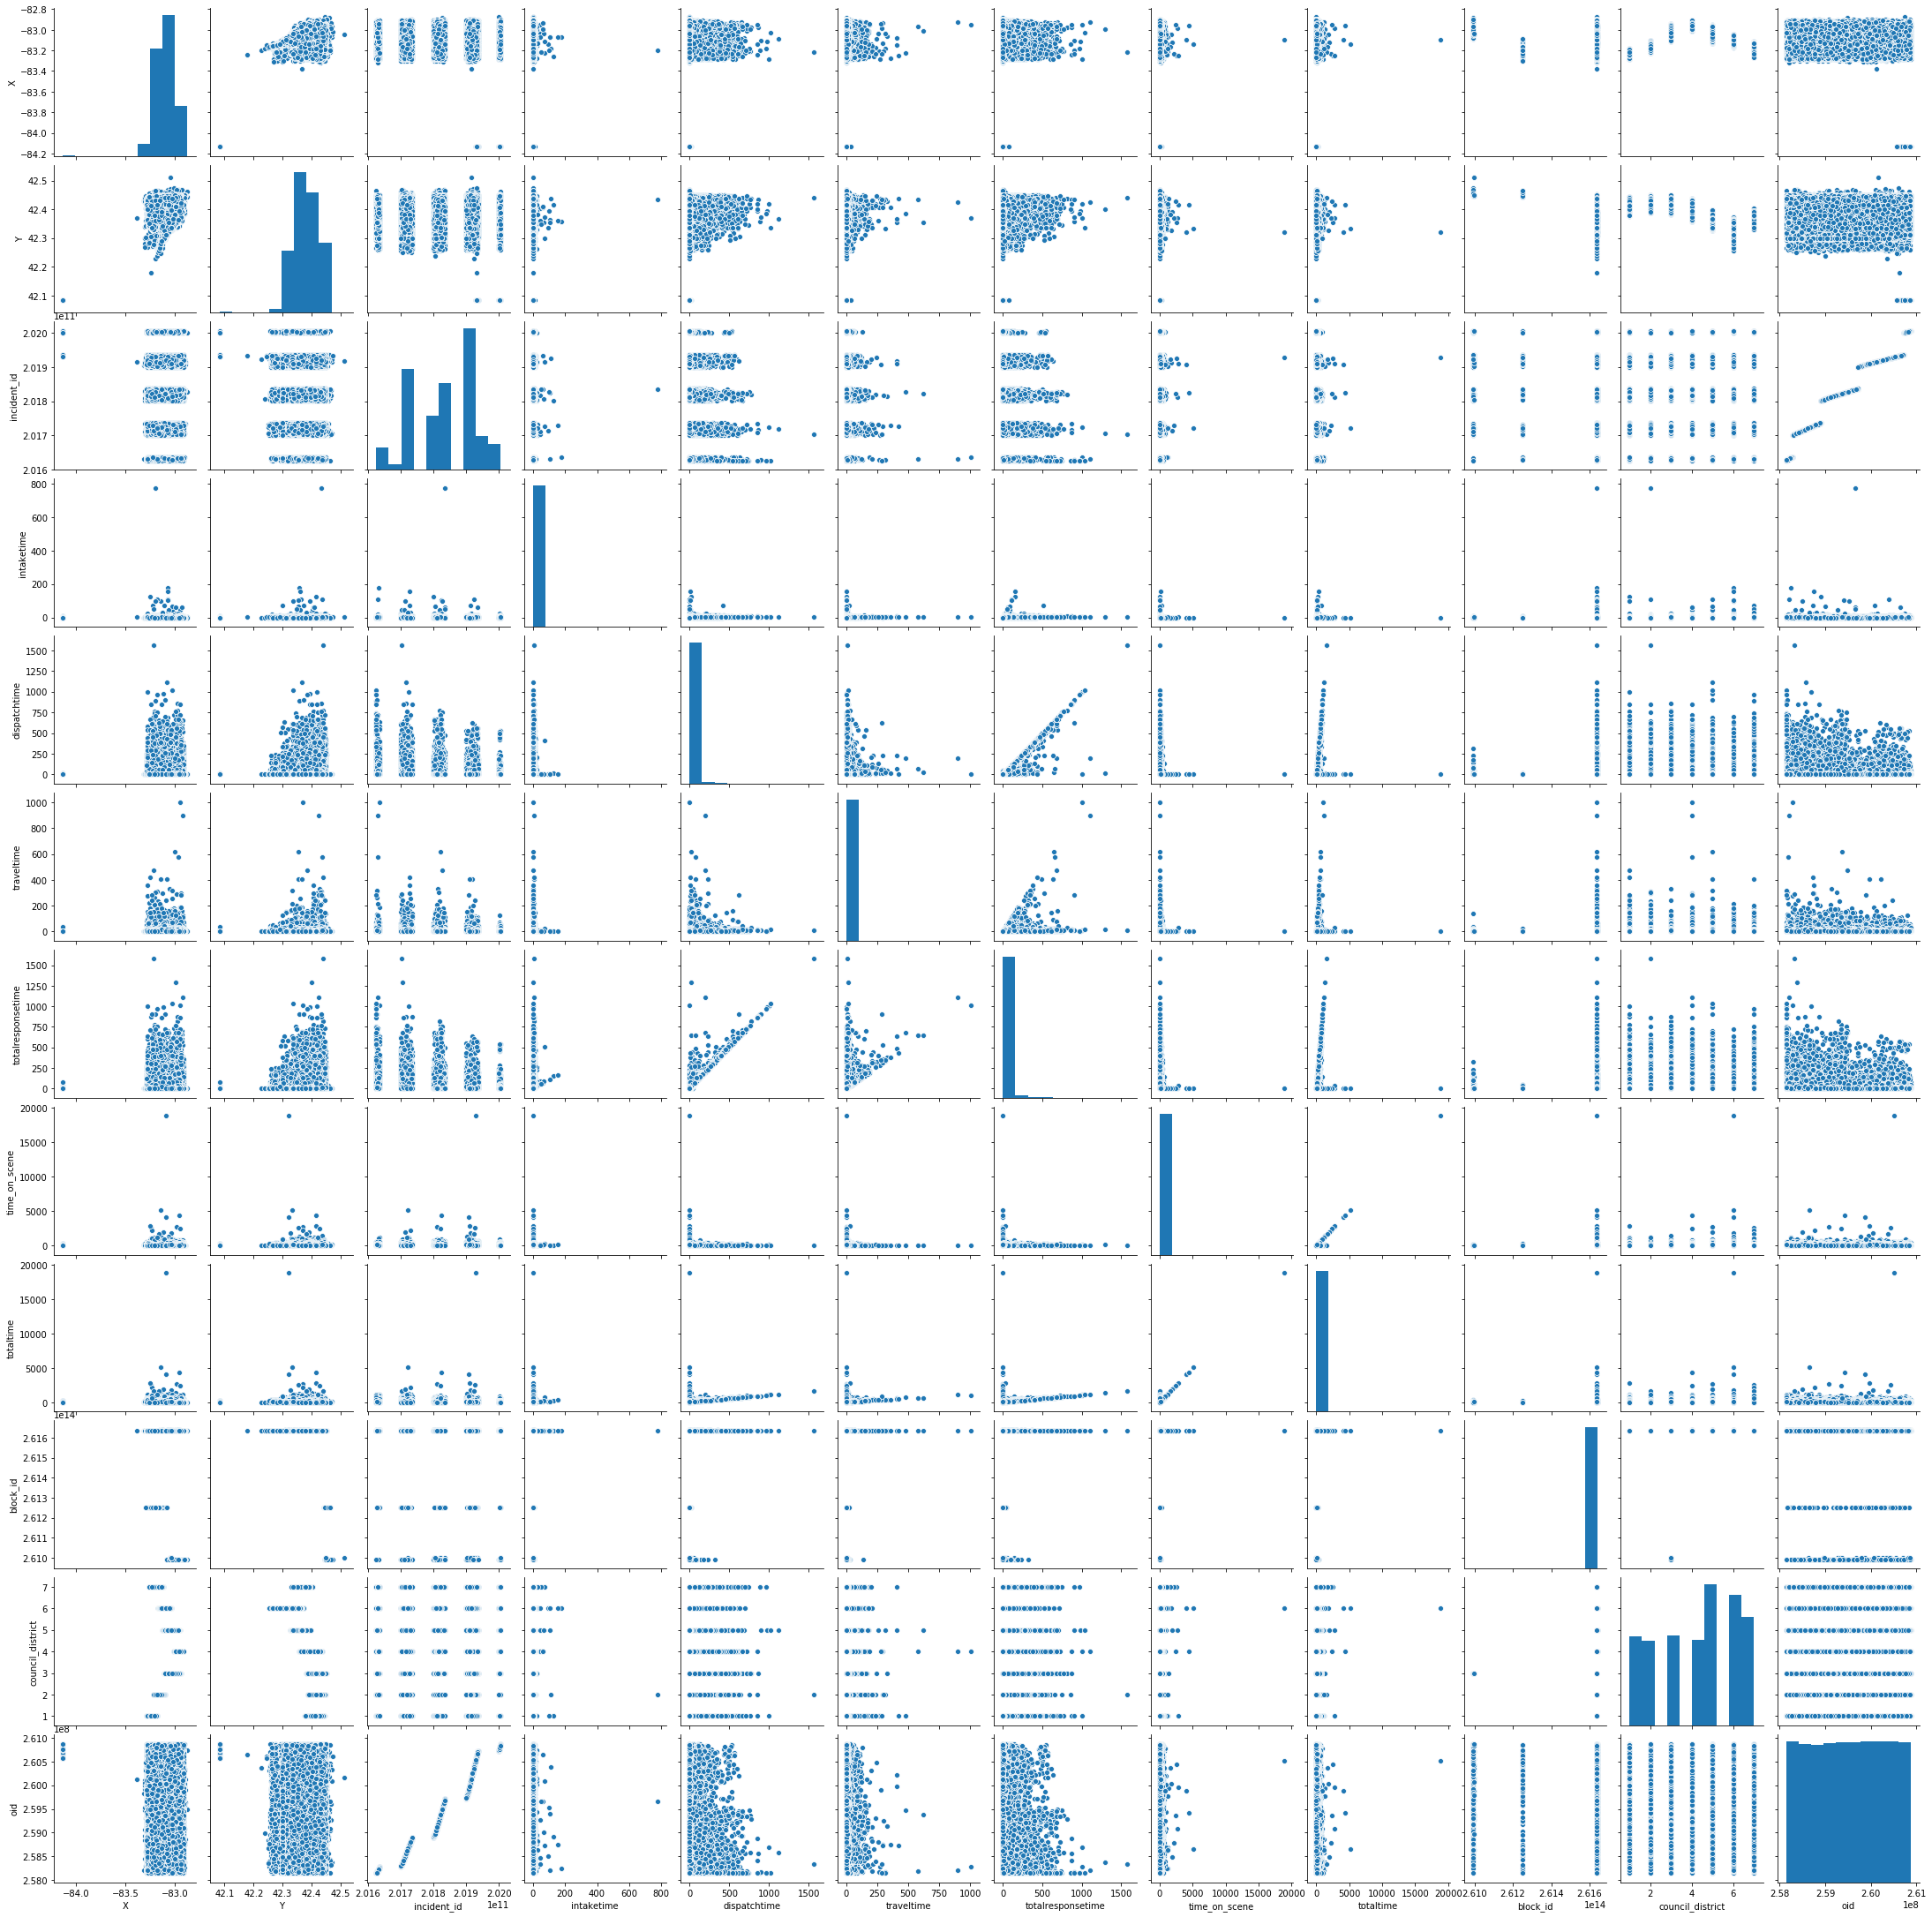

In [19]:
df_sample = df.sample(100000, random_state=42)

sns.pairplot(df_sample)

In [20]:
#    and finally lets just take a quick look at the cardinality of our categorical columns

df.select_dtypes(exclude='number').nunique().sort_values(ascending=False)

call_timestamp      2682393
respondingunit       264129
incident_address      20663
callcode                341
calldescription         263
precinct_sca            240
category                239
neighborhood            207
zip_code                 66
priority                  9
officerinitiated          2
agency                    2
dtype: int64

#### Lets save the cleaned-up notebook for use in our next notebook where we will do our wrangling and feature engineering

In [21]:
df.to_csv(project_dir+'/data/detroit_911_calls_cleaned.csv')